# 9. 机器学习过程

<style>
.header {
  color: #111111;
  background-color: #D9EEE1;
  padding: 20px;
}
</style>

<div class=header>

学习是一个**循环**的过程，机器学习模型通过多次循环数据进行训练。

每次迭代都会调整**权重值**，当迭代无法**降低成本函数**时，

训练完成。
</div>

- [9.1 梯度下降](#1)
- [9.2 线性回归模型](#2)
- [9.3 成本函数](#3)
- [9.4 训练函数](#4)
- [9.5 更新权重](#5)
- [9.6 测试运行](#6)

本章以线性回归模型为例说明整个机器学习的过程。

<a name='1'></a>
## 9.1 梯度下降

梯度下降是一种解决 AI 问题的流行算法。

一个简单的线性回归模型可用于演示梯度下降。

线性回归的目标是将线性图拟合到一组 $(x,y)$ 点。这可以用数学公式来解决。但机器学习算法也可以解决这个问题。

它从散点图和线性模型 $y = wx + b$ 开始。

然后它训练模型以找到适合该图的直线。这是通过改变线的权重（斜率）和偏差（截距）来实现的。

<a name='2'></a>
## 9.2 线性回归模型

下面代码定义了一个线性回归模型：

In [5]:
import matplotlib.pyplot as plt
import numpy as np

class LinerRegression:
    def __init__(self, xs, ys) -> None:
        self.xa = np.array(xs)
        self.ya = np.array(ys)
        self.count = len(xs)
        self.learn_rate = 0.00001
        self.weight = 0.5
        self.bias = 1.0
        self.coust = 0.0
        
    def _cost(self):
        _total = 0.0
        for i in range(self.count):
            _total += (self.ya[i] -(self.xa[i]*self.weight + self.bias))**2
        return _total/self.count
    
    def train(self, iter):
        for i in range(iter):
            self._update()
        self.cost = self._cost()
        
    def _update(self):
        w_derivative = 0.0
        b_derivative = 0.0
        for i in range(self.count):
            wx = self.ya[i] - (self.weight * self.xa[i] + self.bias)
            w_derivative += -2 * wx * self.xa[i]
            b_derivative += -2 * wx
        self.weight -= (w_derivative/self.count) * self.learn_rate
        self.bias -= (b_derivative/self.count) * self.learn_rate

<a name='3'></a>
## 9.3 成本函数

解决回归问题的标准方法是使用“成本函数”来衡量解决方案的好坏。

该函数使用模型中的权重和偏差：$y = wx + b$，并根据直线与图的拟合程度返回误差。

计算此误差的方法是循环遍历图中的所有 $(x,y)$ 点，并求出每个点的 $y$ 值与直线之间的平方距离之和。

最常规的方法是求距离的平方（以确保正值）并使误差函数可微分。

> 成本函数的另一个名称是损失函数。
> 该函数中使用的公式实际上是这样的：

$E = \frac {1}{N}\sum_1^N (y_i - (mx_i + b))^2 $

> - $E$ 是误差（成本）
> - $N$ 是观测值（点）的总数
> - $y_i$ 是每i个观测值的y值（标签）
> - $x_i$ 是每i个观测值的x值（特征）
> - $m$ 是斜率（权重）
> - $b$ 是截距（偏差）
> - $mx_i + b$ 是预测结果值
> - $\frac {1}{N}\sum_1^N$ 是平方平均值

<a name='4'></a>
## 9.4 训练函数

我们现在将运行梯度下降，梯度下降算法应使成本函数趋向最佳线。每次迭代都应将 $m$ 和 $b$ 都更新为具有较低成本（误差）的线。

为此，我们添加了一个对所有数据进行多次循环的训练函数train。

<a name='5'></a>
## 9.5 更新权重

上面的训练函数应该在每次迭代中更新权重和偏差，移动的方向是使用两个偏导数计算的。

<a name='6'></a>
## 9.6 运行测试

### 9.6.1 训练五次
训练5次后看看回归的质量如何，显然拟合的效果非常不好。

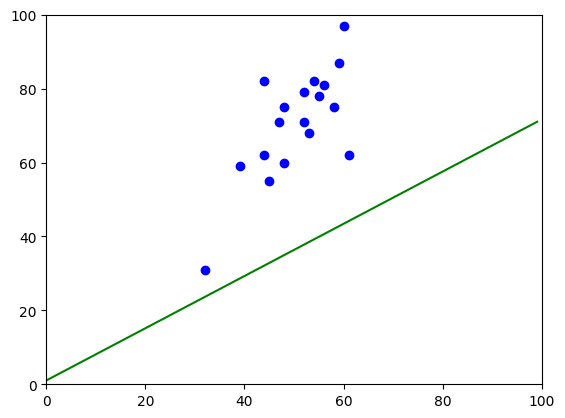

In [11]:
xArray = [32,53,61,47,59,55,52,39,48,52,45,54,44,58,56,48,44,60]
yArray = [31,68,62,71,87,78,79,59,75,71,55,82,62,75,81,60,82,97]

lrmode = LinerRegression(xArray, yArray)
lrmode.train(5)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(xArray, yArray, color='blue')

def func(x):
    return lrmode.weight*x + lrmode.bias

x = np.arange(0, 100, 1)
y = func(x)
plt.plot(x, y, color='green')


<a name='6'></a>
### 9.6.2 增加训练次数

训练500次后在看看回归的质量如何，显然拟合的比之前已经好很多了！

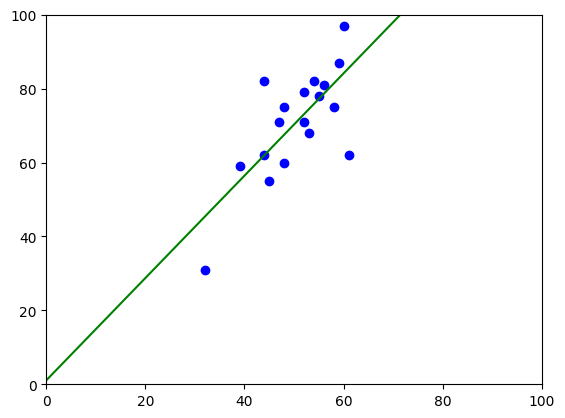

In [12]:
lrmode.train(500)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(xArray, yArray, color='blue')

def func(x):
    return lrmode.weight*x + lrmode.bias

x = np.arange(0, 100, 1)
y = func(x)
plt.plot(x, y, color='green')
